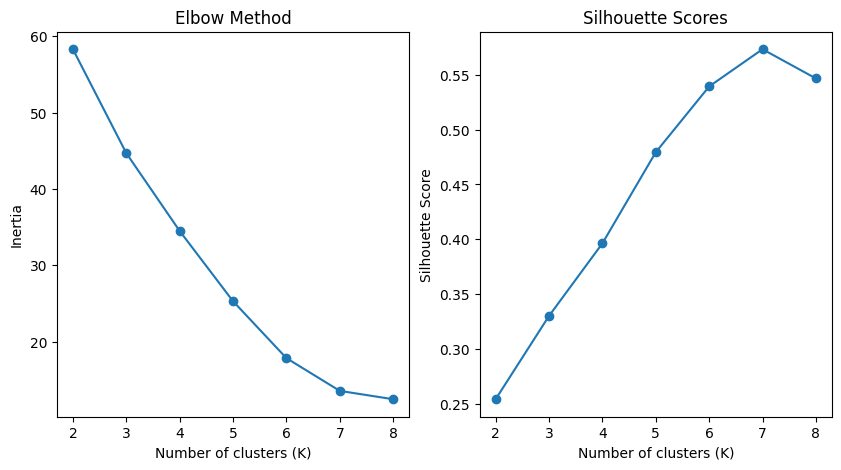

C:\Users\nisha\PycharmProjects\pythonProject1\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Images have been clustered and saved in respective folders.


In [10]:
# This first one is a model where the images are coloured and the model is trained
import os
import cv2
import numpy as np
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Function to load images from a folder
def load_images(folder):
    image_data = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.heic')):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            # Convert BGR (OpenCV format) to RGB (standard format)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            image_data.append(img)
    return image_data

# Function to extract face embeddings using Facenet
def get_face_embeddings(images):

    mtcnn = MTCNN(keep_all=True, device='cuda' if torch.cuda.is_available() else 'cpu')
 
    model = InceptionResnetV1(pretrained='vggface2').eval().to('cuda' if torch.cuda.is_available() else 'cpu')

    embeddings = []
    for img in images:
        # Detect faces
        boxes, _ = mtcnn.detect(img)
        if boxes is not None:
            for box in boxes:
           
                face = img[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
               
                face = cv2.resize(face, (160, 160))
              
                face_tensor = torch.from_numpy(face).permute(2, 0, 1).float().unsqueeze(0) / 255.0
                face_tensor = face_tensor.to('cuda' if torch.cuda.is_available() else 'cpu')
                with torch.no_grad():
               
                    embedding = model(face_tensor)
                embeddings.append(embedding.cpu().numpy().flatten())

    return np.array(embeddings)

# Function to find the optimal K using elbow and silhouette score
def find_optimal_k(embeddings, max_k=8):
    inertia = []
    silhouette_scores = []

    
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(embeddings)
        inertia.append(kmeans.inertia_)

        
        silhouette_avg = silhouette_score(embeddings, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

    # Plotting the elbow method and silhouette scores
    plt.figure(figsize=(10, 5))

    # Elbow method plot
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k + 1), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')

    # Silhouette score plot
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Scores')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette Score')

    plt.show()

# Main workflow
input_folder = "Image_dataset"


images = load_images(input_folder)


face_embeddings = get_face_embeddings(images)


find_optimal_k(face_embeddings)

optimal_k = 6  # Adjust based on analysis


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(face_embeddings)


labels = kmeans.labels_


output_folder = "output"  
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for i, filename in enumerate(os.listdir(input_folder)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.heic')):
        img_path = os.path.join(input_folder, filename)
        cluster_label = labels[i]
        cluster_folder = os.path.join(output_folder, f"cluster_{cluster_label}")
        if not os.path.exists(cluster_folder):
            os.makedirs(cluster_folder)
        img = cv2.imread(img_path)
        output_img_path = os.path.join(cluster_folder, filename)
        cv2.imwrite(output_img_path, img)

print("Images have been clustered and saved in respective folders.")


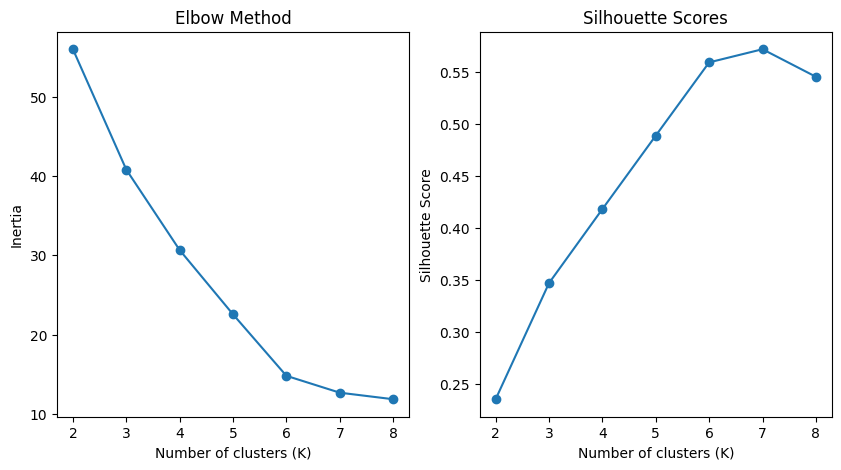

C:\Users\nisha\PycharmProjects\pythonProject1\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Images have been clustered and saved in respective folders.
KMeans model saved to kmeans_model.pkl.


In [3]:
#This is trained based on some analysis where the images are turned to greyscale
import joblib
import os
import cv2
import numpy as np
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


def load_images_grayscale(folder):
    image_data = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.heic')):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            # Convert BGR (OpenCV format) to grayscale
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Convert single-channel grayscale to 3-channel grayscale (so the model can still accept it)
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            image_data.append(img)
    return image_data


def get_face_embeddings(images):
    
    mtcnn = MTCNN(keep_all=True, device='cuda' if torch.cuda.is_available() else 'cpu')
    
    model = InceptionResnetV1(pretrained='vggface2').eval().to('cuda' if torch.cuda.is_available() else 'cpu')

    embeddings = []
    for img in images:
        # Detect faces
        boxes, _ = mtcnn.detect(img)
        if boxes is not None:
            for box in boxes:
               
                face = img[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
                
                face = cv2.resize(face, (160, 160))
               
                face_tensor = torch.from_numpy(face).permute(2, 0, 1).float().unsqueeze(0) / 255.0
                face_tensor = face_tensor.to('cuda' if torch.cuda.is_available() else 'cpu')
                with torch.no_grad():
                    
                    embedding = model(face_tensor)
                embeddings.append(embedding.cpu().numpy().flatten())

    return np.array(embeddings)


def find_optimal_k(embeddings, max_k=8):
    inertia = []
    silhouette_scores = []

    
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(embeddings)
        inertia.append(kmeans.inertia_)

       
        silhouette_avg = silhouette_score(embeddings, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

    # Plotting the elbow method and silhouette scores
    plt.figure(figsize=(10, 5))

 
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k + 1), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')

    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Scores')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette Score')

    plt.show()

input_folder = "Image_dataset"  

images = load_images_grayscale(input_folder)


face_embeddings = get_face_embeddings(images)


find_optimal_k(face_embeddings)

optimal_k = 6 


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(face_embeddings)

labels = kmeans.labels_

output_folder = "output" 
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for i, filename in enumerate(os.listdir(input_folder)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.heic')):
        img_path = os.path.join(input_folder, filename)
        cluster_label = labels[i]
        cluster_folder = os.path.join(output_folder, f"cluster_{cluster_label}")
        if not os.path.exists(cluster_folder):
            os.makedirs(cluster_folder)
        img = cv2.imread(img_path)
        output_img_path = os.path.join(cluster_folder, filename)
        cv2.imwrite(output_img_path, img)

print("Images have been clustered and saved in respective folders.")


model_filename = "kmeans_model.pkl"
joblib.dump(kmeans, model_filename)
print(f"KMeans model saved to {model_filename}.")